# KHULIKA MALKAN
### 2311110057

In [54]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

# Load Data

In [3]:
iris = pd.read_csv("Dataset-Tugas.csv")
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [28]:
# (baris, kolom)
iris.shape

(150, 6)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


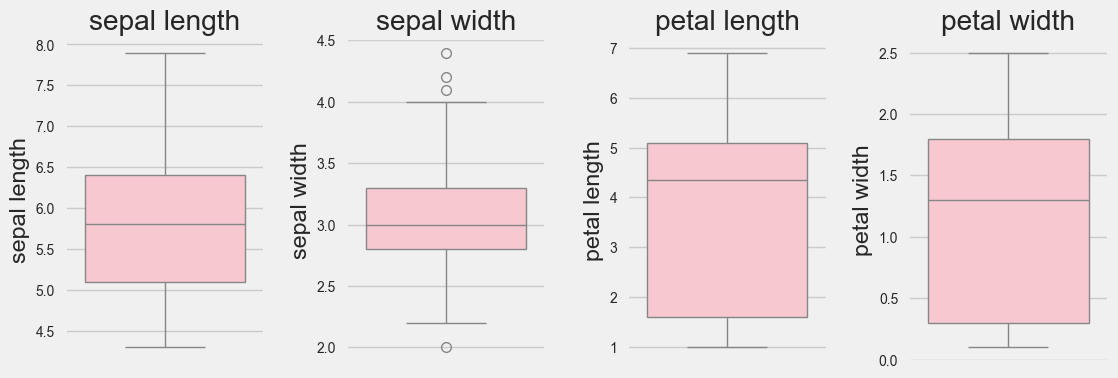

In [31]:
def box_plot(iris):
  #Definisikan variabel
  variables = iris.columns[:4] #berarti mengambil 4 data

  #buat figure dan juga axes untuk subplot uk 1 x 3
  fig, axes = plt.subplots(1, 4, figsize=(12, 4))
  fig.subplots_adjust(hspace=0.4,wspace=0.4)

  #iterasi melalui setiap variabel
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=iris, color="pink", ax=axes[i])
    axes[i].set_title(var)

  plt.show()
box_plot(iris)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris["class"] = le.fit_transform(iris["class"])
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
#instantiate
scaler = MinMaxScaler()

#fit and transform
iris_scaled = scaler.fit_transform(iris)
iris_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ,
        0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ,
        0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ,
        0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ,
        0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ,
        0.        ],
       [0.30555556, 0.79166667, 0.11864407, 0.125     , 0.        ,
        0.        ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333, 0.        ,
        0.        ],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667, 0.        ,
        0.        ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667, 0.        ,
        0.        ],
       [0.16666667, 0.45833333, 0.08474576, 0.        , 0.        ,
        0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667, 0.        ,
        0.        ],
       [0.13888889, 0

# MODELING

**K-Means**

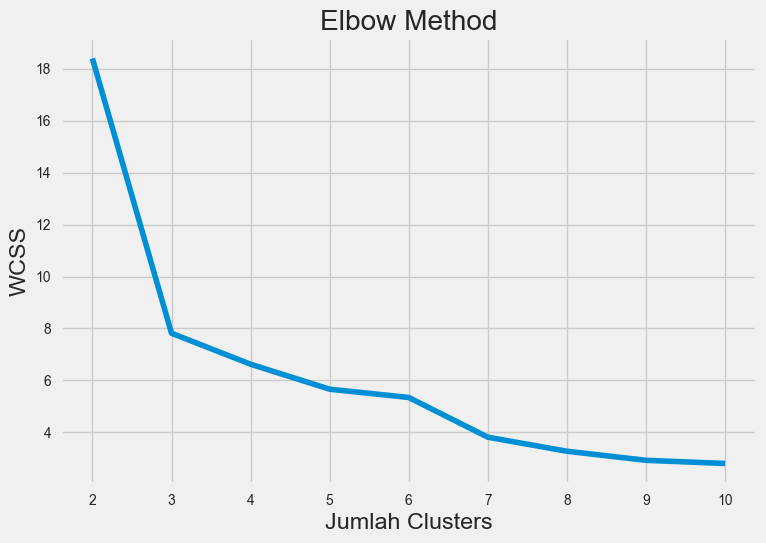

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(iris_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(2,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Jumlah Clusters")
plt.ylabel("WCSS")
plt.show()

Berdasarkan plot elbow di atas, bisa dilihat titik siku yang menunjukkan jumlah klaster optimal. Biasanya, titik di mana penurunan inertia mulai melambat secara signifikan dipilih sebagai jumlah klaster optimal.

Kemudian, membuat model K-Means dengan jumlah klaster yang sesuai (misalnya, 3 jika itu terlihat sebagai titik siku) dan menyimpan label hasil klasterisasi ke dalam kolom baru di data.

In [33]:
# Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters=3,init="k-means++",random_state=42)
y_pred1 = model1.fit_predict(iris_scaled)

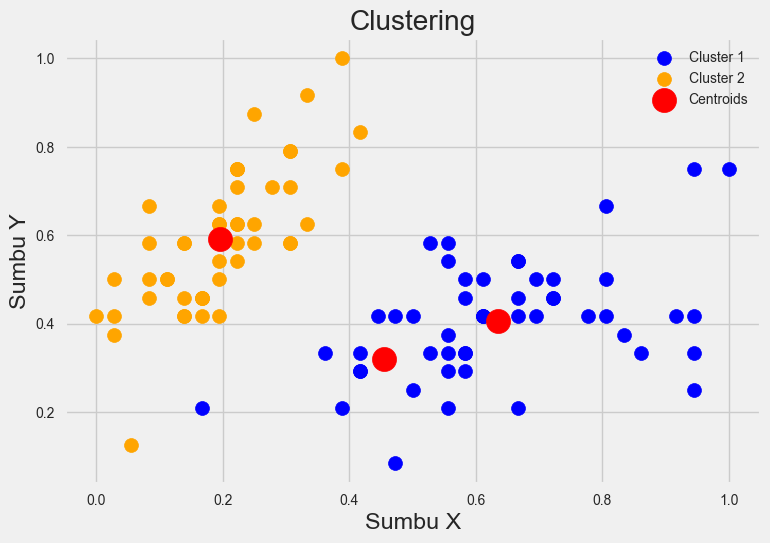

In [60]:
# Visualisasi hasil clusters
plt.scatter(iris_scaled[y_pred1 == 0,0],iris_scaled[y_pred1 == 0,1],s=100,c="blue",label="Cluster 1")
plt.scatter(iris_scaled[y_pred1 == 1,0],iris_scaled[y_pred1 == 1,1],s=100,c="orange",label="Cluster 2")
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],s=300,c="red",label="Centroids")

plt.title("Clustering")
plt.xlabel("Sumbu X")
plt.ylabel("Sumbu Y")
plt.legend()
plt.show()

Interpretasi:

1. Distribusi Klaster: terlihat bahwa klaster biru dan oranye memiliki distribusi yang jelas dan terpisah satu sama lain, ini menunjukkan bahwa model K-Means berhasil memisahkan data menjadi klaster yang berbeda. Jika ada area yang saling tumpang tindih, itu menunjukkan bahwa beberapa data di klaster tersebut mungkin memiliki karakteristik serupa.

2. Centroid: Centroid yang ditampilkan dengan warna merah adalah titik rata-rata dari semua data dalam klaster. Mereka menunjukkan pusat gravitasi klaster tersebut.
Posisi centroid dapat memberikan gambaran di mana pusat distribusi data di masing-masing klaster berada.

# DB-Scan

In [36]:
# Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2=DBSCAN(eps=0.5,min_samples=10)

# Melakukan clustering
model2.fit(iris_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
# Tambahan label tersebt menjadi kolom terbaru didataset
iris["Hasil_cluster"]=model2.labels_
iris

,sepal length,sepal width,petal length,petal width,class,Hasil_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


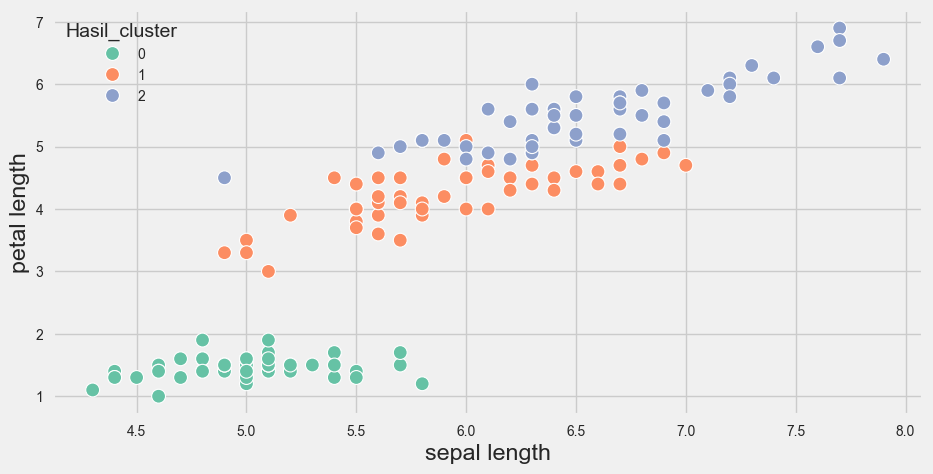

In [41]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="sepal length", y="petal length", hue="Hasil_cluster", data=iris, palette="Set2", s=100);

#### Interpretasi Visualisasi
Scatter plot diatas menunjukkan bagaimana data diatur dalam dua dimensi berdasarkan panjang kelopak dan mahkota bunga.
Titik-titik diwarnai berdasarkan hasil klasterisasi (Hasil_cluster), sehingga kita dapat melihat distribusi masing-masing klaster.
Berdasarkan plot diatas terlihat bahwa klasternya terpisah, ini menunjukkan bahwa fitur sepal length dan petal length memberikan pembedaan yang efektif antara klaster. Dengan kata lain Klaster dengan titik yang lebih tinggi di sumbu Y mungkin memiliki petal length yang lebih panjang.

# Matriks Evaluasi

**1. Silhouette_Score**

In [42]:
# Menghitung Hasil Silhouette algoritma K-Means
Evaluasi_KMeans=silhouette_score(iris_scaled,y_pred1)
print(f"Hasil Silhouette : {Evaluasi_KMeans}")

Hasil Silhouette : 0.6877661844553483


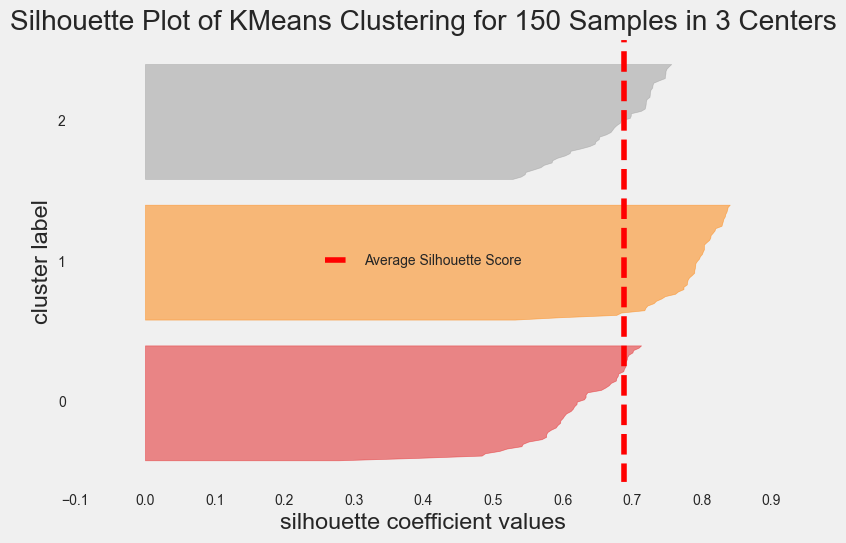

In [46]:
# Membuat Silhouette Visualitation untuk algoritma K-Means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(iris_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Nilai Silhouette Score berkisar antara -1 dan 1, dan skor yang lebih tinggi menunjukkan bahwa objek-objek dalam satu cluster lebih mirip satu sama lain dan lebih jauh dari objek di cluster lain. Jadi:

- Semakin mendekati 1, semakin baik kekompakan dan pemisahan antar-cluster.
- Skor mendekati 0 menunjukkan bahwa cluster berada di perbatasan atau kurang jelas.
- Skor negatif menunjukkan bahwa data mungkin salah klasterisasi, di mana beberapa titik berada lebih dekat dengan titik-titik di cluster lain daripada cluster mereka sendiri.

Secara umum, nilai Silhouette Score yang jauh dari 0 (positif tinggi) memang menunjukkan bahwa kualitas clustering semakin bagus.

In [25]:
Evaluasi_DBScan=silhouette_score(iris_scaled,y_pred2)
print(f"Hasil Silhouette : {Evaluasi_DBScan}") #Semakin menjauhi 0 maka semakin bagus kekompakan clusternya

Hasil Silhouette : 0.6227832025859832


**2. Davies-Bouldin Index (DBI)**

**Davies-Bouldin Index (DBI)** adalah metrik yang digunakan untuk mengevaluasi kualitas clustering, di mana nilai semakin mendekati 0 menunjukkan clustering yang lebih baik.

Berikut adalah beberapa poin tentang Davies-Bouldin Index:

- **Semakin rendah nilai DBI (mendekati 0)**, semakin baik clustering-nya, karena ini menunjukkan bahwa rata-rata jarak antar-cluster lebih besar daripada rata-rata jarak dalam cluster.
- DBI dihitung berdasarkan rasio jarak antara centroids dari cluster yang berbeda dengan ukuran cluster itu sendiri. Nilai DBI yang rendah menunjukkan bahwa cluster memiliki jarak antar-cluster yang signifikan dan kekompakan intra-cluster yang baik.
  
Jadi, nilai DBI yang rendah memang merupakan indikasi clustering yang baik.

In [47]:
# Menghitung Davies Boulding Index (DBI) algoritma K-Means
dbi_score1=davies_bouldin_score(iris_scaled, y_pred1)
print(f"Nilai Davies-Bouldin: {dbi_score1}") #Semakin dekat dengan 0 berarti semakin bagus kekompakan clusternya

Nilai Davies-Bouldin: 0.476557467376274


#### Interpretasi Nilai:
Dengan DBI sebesar 0.47, kita dapat menyimpulkan bahwa model K-Means telah berhasil mengelompokkan data dengan kualitas yang memadai.
Klaster yang dihasilkan cukup solid dan tidak terlalu saling tumpang tindih.

In [48]:
# Menghitung Davies Boulding Index (DBI) algoritma db-scan
dbi_score2=davies_bouldin_score(iris_scaled,y_pred2)
print(f"Nilai Davies-Bouldin: {dbi_score2}")

Nilai Davies-Bouldin: 0.476557467376274


#### Interpretasi:
DBI dengan nilai yang sama (0.47) untuk kedua algoritma (K-Means dan DBSCAN) menunjukkan bahwa keduanya menghasilkan klasterisasi dengan kekompakan dan pemisahan antar-klaster yang sebanding.

# Hyperparametertuning

Hyperparemeter tuning
- Grid Search
- Random Search
- Bayesian Search
- PSO
- GWO, etc